# <div style="text-align: center; background-color: #682F2F; font-family:bookantique; color: white; padding: 14px; line-height: 1;border-radius:20px">Heart Disease Prediction</div>

<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
    <h4 style="text-align: Center; background-color: #682F2F; font-family:newtimeroman; color: white; padding: 14px; line-height: 1; border-radius:10px"><b>Table of Contents📝</b></h4>
    
   * [1. Business Context](#1)
        - [1.1 Problem ](#1.1)
        - [1.2. Solution](#1.2)
   * [2. Import Important Libraries](#2)
   * [3. Data Exploration](#3)
   * [4. Model Building](#4)
   * [5. Solution](#5)
   * [6. Conclusion](#6)

<a id="1"></a>
# <div style="text-align: center; background-color: #682F2F; font-family:newtimeroman;font-size:15px color: white; padding: 14px; line-height:0.5;border-radius:20px">Business Context</div>

### Problem

World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications.

### Solution

I have developed a model that can predict the potential risk of having a hearty disease for the patients in near future(next 10 year).

<a id="2"></a>
# <div style="text-align: center; background-color: #682F2F; font-family:newtimeroman;font-size:15px color: white; padding: 14px; line-height:0.5;border-radius:20px">Importing Libraries </div>

In [1]:
# For data analysis and Cleaning of data
import pandas as pd
import numpy as np

# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
import sklearn
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, ComplementNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBRFClassifier,XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,roc_curve


# Deep learning
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Embedding, Input,GlobalMaxPool1D,Dropout
from keras.preprocessing.text import one_hot, Tokenizer


In [2]:
all_estimators = sklearn.utils.all_estimators(type_filter=None)

# styling
%matplotlib inline
# sns.set_theme(style="dark")
# mpl.rcParams['axes.unicode_minus'] = False
# pd.set_option('display.max_columns',None)
# plt.style.use('seaborn-dark-palette')
# plt.style.use('dark_background')

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

<a id="3"></a>
# <div style="text-align: center; background-color: #682F2F; font-family:newtimeroman;font-size:15px color: white; padding: 14px; line-height:0.5;border-radius:20px">Data Exploration </div>

#### About Dataset:

Each attribute is a potential risk factor. There are both demographic, behavioural and medical risk factors.

    Demographic: 
    sex: male or female;(Nominal)
    age: age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
    Education: Education of the person;(Nominal)

    Behavioural
    currentSmoker: whether or not the patient is a current smoker (Nominal)
    cigsPerDay: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarretts, even half a cigarette.)

    Medical( history):
    BPMeds: whether or not the patient was on blood pressure medication (Nominal)
    prevalentStroke: whether or not the patient had previously had a stroke (Nominal)
    prevalentHyp: whether or not the patient was hypertensive (Nominal)
    diabetes: whether or not the patient had diabetes (Nominal)

    Medical(current):
    totChol: total cholesterol level (Continuous)
    sysBP: systolic blood pressure (Continuous)
    diaBP: diastolic blood pressure (Continuous)
    BMI: Body Mass Index (Continuous)
    heartRate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
    glucose: glucose level (Continuous)

    Predict variable (desired target):
    10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

#### Reading data

In [3]:
df = pd.read_csv('heart_data.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


#### Data Exploration

In [4]:
categorical_clm = []
continous_clm = []
for column in df.columns:
    print("--------------------")
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 5:
        categorical_clm.append(column)
    else:
        continous_clm.append(column)

--------------------
male : [1 0]
--------------------
age : [39 46 48 61 43 63 45 52 50 41 38 42 44 47 60 35 36 59 54 37 56 53 49 65
 51 62 40 67 57 66 64 55 58 34 68 33 70 32 69]
--------------------
education : [ 4.  2.  1.  3. nan]
--------------------
currentSmoker : [0 1]
--------------------
cigsPerDay : [ 0. 20. 30. 23. 15.  9. 10.  5. 35. 43.  1. 40.  3.  2. nan 12.  4. 18.
 25. 60. 14. 45.  8. 50. 13. 11.  7.  6. 38. 29. 17. 16. 19. 70.]
--------------------
BPMeds : [ 0.  1. nan]
--------------------
prevalentStroke : [0 1]
--------------------
prevalentHyp : [0 1]
--------------------
diabetes : [0 1]
--------------------
totChol : [195. 250. 245. 225. 285. 228. 205. 313. 260. 254. 247. 294. 332. 226.
 221. 232. 291. 190. 185. 234. 215. 270. 272. 295. 209. 175. 214. 257.
 178. 233. 180. 243. 237.  nan 311. 208. 252. 261. 179. 194. 267. 216.
 240. 266. 255. 220. 235. 212. 223. 300. 302. 248. 200. 189. 258. 202.
 213. 183. 274. 170. 210. 197. 326. 188. 256. 244. 193. 239. 296

In [5]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [6]:
print(df.shape)
df['TenYearCHD'].value_counts()

(4238, 16)


0    3594
1     644
Name: TenYearCHD, dtype: int64

We have data set which is imbalanced in nature. Take care while splitting the data.

In [7]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [8]:
df = df.dropna()

#### Data visualization

In [9]:
# sns.pairplot(df, hue= 'TenYearCHD')

<AxesSubplot:>

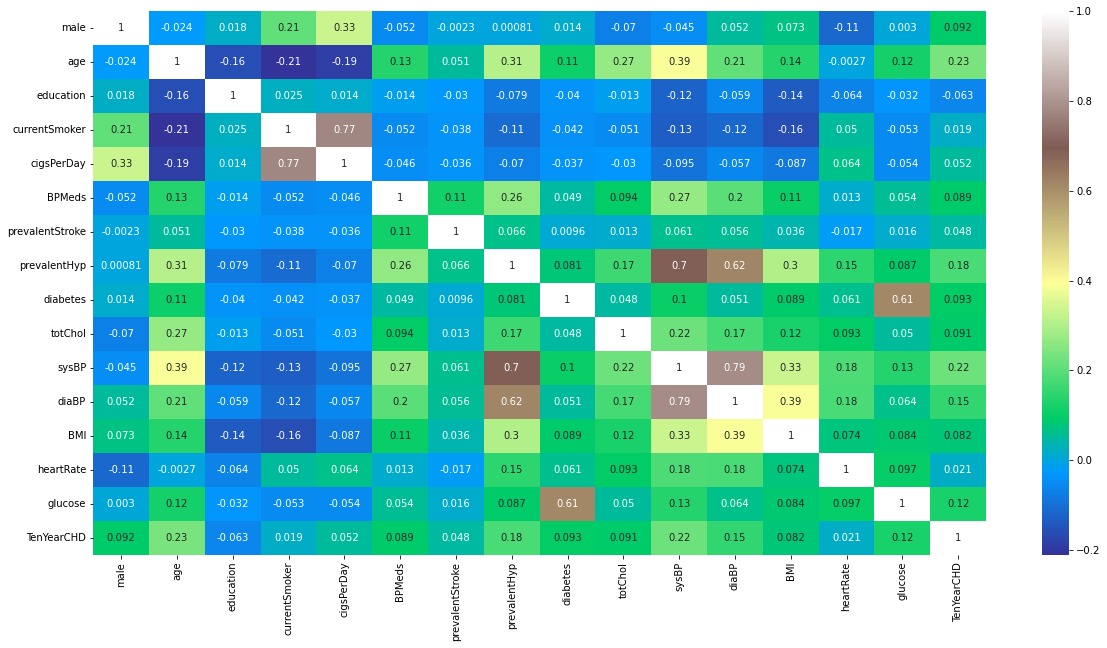

In [10]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot= True, cmap='terrain')

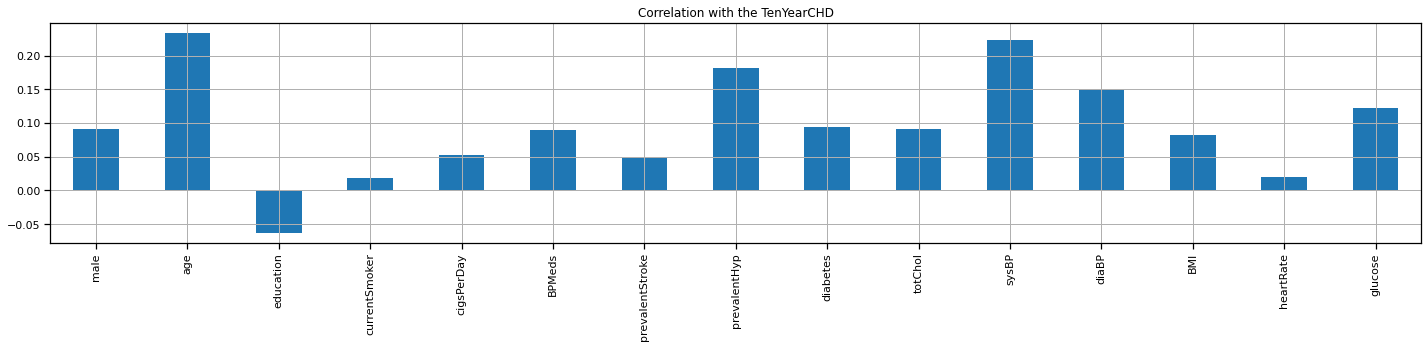

In [11]:
sns.set_context('notebook',font_scale = 1)
df.drop('TenYearCHD', axis=1).corrwith(df.TenYearCHD).plot(kind='bar', grid=True, figsize=(20, 5), title="Correlation with the TenYearCHD")
plt.tight_layout()

<AxesSubplot:xlabel='male', ylabel='count'>

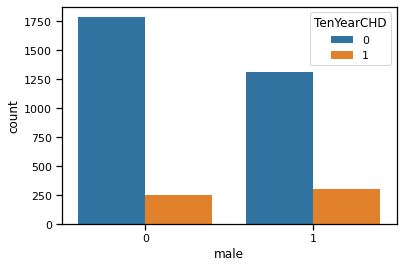

In [12]:
sns.countplot(df['male'],hue=df["TenYearCHD"])

male                  AxesSubplot(0.125,0.749828;0.168478x0.130172)
age                AxesSubplot(0.327174,0.749828;0.168478x0.130172)
education          AxesSubplot(0.529348,0.749828;0.168478x0.130172)
currentSmoker      AxesSubplot(0.731522,0.749828;0.168478x0.130172)
cigsPerDay            AxesSubplot(0.125,0.593621;0.168478x0.130172)
BPMeds             AxesSubplot(0.327174,0.593621;0.168478x0.130172)
prevalentStroke    AxesSubplot(0.529348,0.593621;0.168478x0.130172)
prevalentHyp       AxesSubplot(0.731522,0.593621;0.168478x0.130172)
diabetes              AxesSubplot(0.125,0.437414;0.168478x0.130172)
totChol            AxesSubplot(0.327174,0.437414;0.168478x0.130172)
sysBP              AxesSubplot(0.529348,0.437414;0.168478x0.130172)
diaBP              AxesSubplot(0.731522,0.437414;0.168478x0.130172)
BMI                   AxesSubplot(0.125,0.281207;0.168478x0.130172)
heartRate          AxesSubplot(0.327174,0.281207;0.168478x0.130172)
glucose            AxesSubplot(0.529348,0.281207

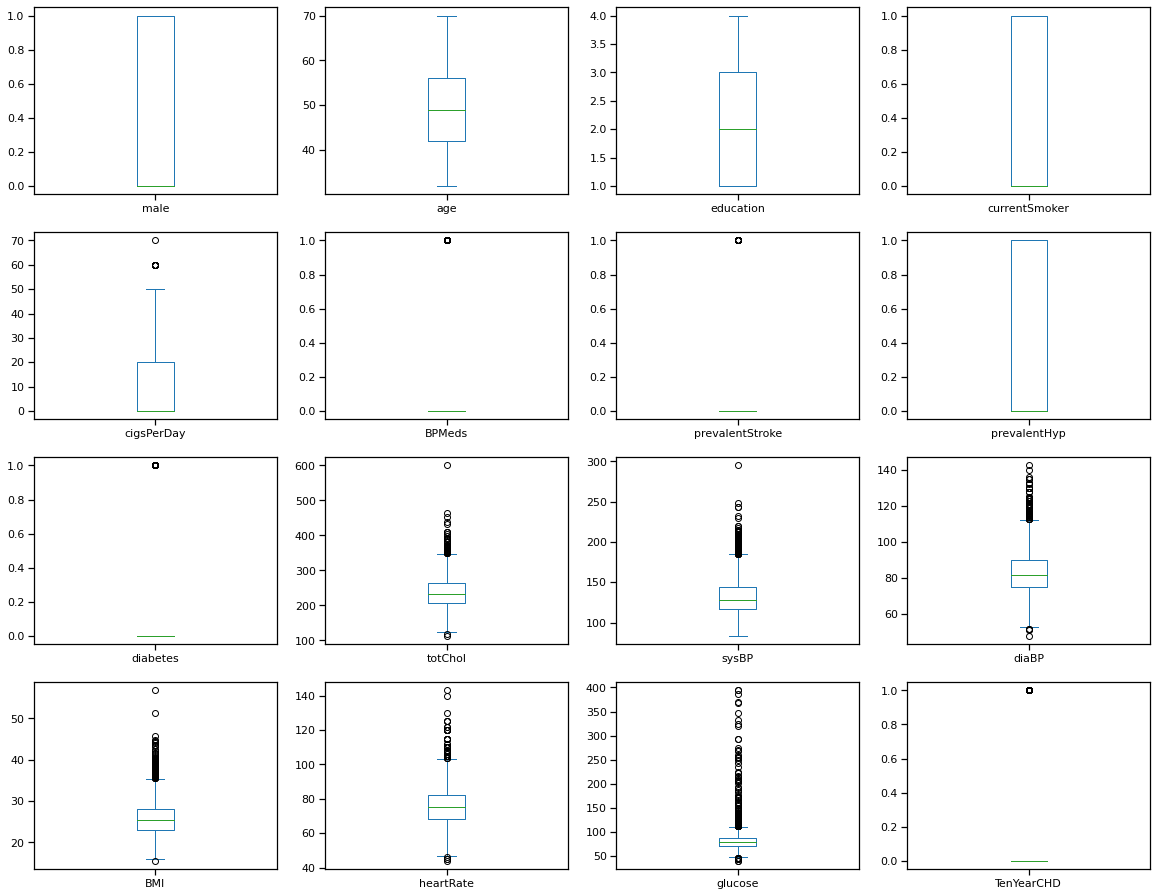

In [13]:
df.plot(kind='box', subplots=True, layout=(5,4), figsize=(20,20))

#### Statistical analysis

In [14]:
Z= df.drop(columns='TenYearCHD', axis=1)

In [15]:
from statsmodels.tools import add_constant
import statsmodels.api as sm

heart_df_constant = add_constant(df)

# sm.chisqprob = lambda chisq, df: sm.chi2.sf(chisq, df)
cols=heart_df_constant.columns[:-1]
model=sm.Logit(df.TenYearCHD,heart_df_constant[cols])
# model=sm.Logit(df.TenYearCHD, Z )
result=model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.376668
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3656
Model:                          Logit   Df Residuals:                     3640
Method:                           MLE   Df Model:                           15
Date:                Tue, 11 Oct 2022   Pseudo R-squ.:                  0.1174
Time:                        18:43:10   Log-Likelihood:                -1377.1
converged:                       True   LL-Null:                       -1560.3
Covariance Type:            nonrobust   LLR p-value:                 8.027e-69
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.3222      0.715    -11.632      0.000      -9.725      -6.920
male                0.5551      0.109      5.090      0.000       0.341       0.769
age                 0.0635      0.007      9.499      0.000       0.050       0.077
education          -0.0475      0.049     -0.962      0.336      -0.144       0.049
currentSmoker       0.0709      0.157      0.452      0.651      -0.236       0.378
cigsPerDay          0.0179      0.006      2.874      0.004       0.006       0.030
BPMeds              0.1623      0.234      0.692      0.489      -0.297       0.621
prevalentStroke     0.6935      0.490      1.417      0.157      -0.266       1.653
prevalentHyp        0.2346      0.138      1.700      0.089      -0.036       0.505
diabetes            0.0395      0.315      0.125      0.900      -0.579       0.658
totChol             0.0023      0.001      2.062      0.039       0.000       0.005
sysBP               0.0154      0.004      4.043      0.000       0.008       0.023
diaBP              -0.0041      0.006     -0.642      0.521      -0.017       0.008
BMI                 0.0066      0.013      0.518      0.605      -0.018       0.032
heartRate          -0.0032      0.004     -0.772      0.440      -0.012       0.005
glucose             0.0071      0.002      3.189      0.001       0.003       0.012
===================================================================================
"""

The results above show some of the attributes with P-value higher than the preferred alpha(5%) and thereby showing low statistically significant relationship with the probability of heart disease. Backward elimination approach is used here to remove those attributes with highest P-value one at a time followed by running the regression repeatedly until all attributes have P Values less than 0.05.
But here 0.1 is used as a threshold

In [38]:
params = np.exp(result.params)
conf = np.exp(result.conf_int())
conf['OR'] = params
pvalue=round(result.pvalues,3)
conf['pvalue']=pvalue
conf.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio','pvalue']
print ((conf))

              CI 95%(2.5%)  CI 95%(97.5%)  Odds Ratio  pvalue
const             0.000057       0.000442    0.000159   0.000
male              1.411297       2.146418    1.740469   0.000
age               1.054342       1.081280    1.067726   0.000
cigsPerDay        1.011249       1.027948    1.019564   0.000
prevalentHyp      0.970365       1.646338    1.263942   0.082
totChol           1.000040       1.004447    1.002241   0.046
sysBP             1.008698       1.020052    1.014359   0.000
glucose           1.004055       1.010663    1.007354   0.000


In [16]:
cols

Index(['const', 'male', 'age', 'education', 'currentSmoker', 'cigsPerDay',
       'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol',
       'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose'],
      dtype='object')

#### Feature Engineering

In [17]:
def back_feature_elem (data_frame,pre_value,col_list):
    
    while len(col_list)>0 :
        model=sm.Logit(pre_value,data_frame[col_list])
        result=model.fit(disp=0)
        largest_pvalue=round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.1):
            return result
            break
        else:
            col_list=col_list.drop(largest_pvalue.index)
            
result=back_feature_elem(heart_df_constant, df.TenYearCHD ,cols)

In [18]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3656
Model:                          Logit   Df Residuals:                     3648
Method:                           MLE   Df Model:                            7
Date:                Tue, 11 Oct 2022   Pseudo R-squ.:                  0.1157
Time:                        18:43:10   Log-Likelihood:                -1379.7
converged:                       True   LL-Null:                       -1560.3
Covariance Type:            nonrobust   LLR p-value:                 5.315e-74
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -8.7491      0.522    -16.749      0.000      -9.773      -7.725
male             0.5542      0.107      5.181      0.000       0.345       0.764
age              0.0655      0.006     10.182      0.000       0.053       0.078
cigsPerDay       0.0194      0.004      4.637      0.000       0.011       0.028
prevalentHyp     0.2342      0.135      1.737      0.082      -0.030       0.499
totChol          0.0022      0.001      1.996      0.046    4.04e-05       0.004
sysBP            0.0143      0.003      4.993      0.000       0.009       0.020
glucose          0.0073      0.002      4.378      0.000       0.004       0.011
================================================================================
"""

In [19]:
useful_clm = ['male','age','cigsPerDay','prevalentHyp','totChol','sysBP','glucose']

In [20]:
df= df[['male','age','cigsPerDay','prevalentHyp','totChol','sysBP','glucose','TenYearCHD']]

<a id="4"></a>
# <div style="text-align: center; background-color: #682F2F; font-family:newtimeroman;font-size:15px color: white; padding: 14px; line-height:0.5;border-radius:20px">Model Building </div>

#### Use most popular algos,
Use some of the most popular ML classification algo to find out the most effective algo.
    
* Logistic Regression
* Naive Bayes
* Support Vector classifier
* Random forest classifier
* AdaBoost classifier
* GradientBoost classifier
* KNN classifier
* XGBoost classifier

And we will also use Deep Learning method to find best solution

In [21]:
x = df.drop(labels='TenYearCHD', axis=1)
y = df['TenYearCHD']

x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2,stratify=y, random_state=7)

In [22]:
y_train.value_counts()

0    2479
1     445
Name: TenYearCHD, dtype: int64

In [23]:
y_test.value_counts()

0    620
1    112
Name: TenYearCHD, dtype: int64

In [24]:
models = []
models.append(("lgc",LogisticRegression()))
models.append(("gnb",GaussianNB()))
models.append(("SVMc",SVC()))
models.append(("rfc",RandomForestClassifier()))
models.append(("abc",AdaBoostClassifier()))
models.append(("gbc",GradientBoostingClassifier()))
models.append(("knn",KNeighborsClassifier()))
models.append(("xgbc",XGBClassifier(eval_metric='mlogloss')))
models.append(("xgrfbc",XGBRFClassifier(eval_metric='mlogloss')))

##### Evaluation and comparison of the models
    also can use scoring = ['accuracy','precision','recall'] 
    where we can use these metrics to analysis 

In [25]:
results = []
names = []

for name, model in models:
	kfold = model_selection.KFold(n_splits=5)
	cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring='accuracy')
	results.append(cv_results*100)
	names.append(name)
	msg = "%s: %.2f (%.2f)" % (name, cv_results.mean()*100, cv_results.std()*100)
	print(msg)

lgc: 85.26 (1.41)
gnb: 82.66 (1.52)
SVMc: 84.71 (1.25)
rfc: 84.30 (1.14)
abc: 84.90 (1.35)
gbc: 84.85 (1.23)
knn: 83.40 (0.80)
xgbc: 83.51 (1.33)
xgrfbc: 84.85 (1.20)


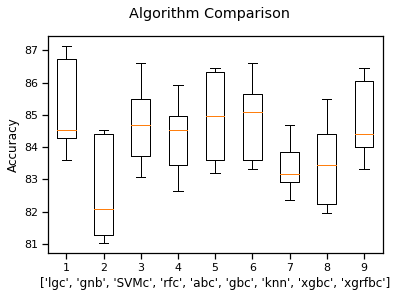

In [26]:
# boxplot of results comparison

fig = plt.figure()
fig.suptitle('Algorithm Comparison')
plt.boxplot(results)
plt.xlabel(names)
plt.ylabel('Accuracy')
plt.show()

#### Artificial Neural Network model

In [27]:
### Artificial Neural Network model
input_dim = x.shape[1]  # Number of features

ann_model = Sequential(layers=[
    Dense(units=1024,activation='softmax',input_shape=[input_dim]),
    Dense(units=512,activation='tanh'),
    Dense(1,activation='sigmoid')]
)

ann_model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
history = ann_model.fit(x_train, y_train,validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
92/92 [==============================] - 1s 9ms/step - loss: 0.4502 - accuracy: 0.8471 - val_loss: 0.4288 - val_accuracy: 0.8470
Epoch 2/10
92/92 [==============================] - 1s 8ms/step - loss: 0.4274 - accuracy: 0.8478 - val_loss: 0.4289 - val_accuracy: 0.8470
Epoch 3/10
92/92 [==============================] - 1s 9ms/step - loss: 0.4272 - accuracy: 0.8478 - val_loss: 0.4299 - val_accuracy: 0.8470
Epoch 4/10
92/92 [==============================] - 1s 9ms/step - loss: 0.4274 - accuracy: 0.8478 - val_loss: 0.4279 - val_accuracy: 0.8470
Epoch 5/10
92/92 [==============================] - 1s 8ms/step - loss: 0.4272 - accuracy: 0.8478 - val_loss: 0.4287 - val_accuracy: 0.8470
Epoch 6/10
92/92 [==============================] - 1s 7ms/step - loss: 0.4276 - accuracy: 0.8478 - val_loss: 0.4285 - val_accuracy: 0.8470
Epoch 7/10
92/92 [==============================] - 1s 7ms/step - loss: 0.4269 - accuracy: 0.8478 - val_loss: 0.4305 - val_accuracy: 0.8470
Epoch 8/10
92/92 [==

In [28]:
ann_model.evaluate(x_train, y_train)
ann_model.evaluate(x_test, y_test)
print(ann_model.summary())

23/23 [==============================] - 0s 2ms/step - loss: 0.4284 - accuracy: 0.8470
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              8192      
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 1)                 513       
                                                                 
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
_________________________________________________________________
None


In [29]:
print(history.history)

{'loss': [0.45023760199546814, 0.42744308710098267, 0.42724737524986267, 0.4273524284362793, 0.4272162914276123, 0.4276139736175537, 0.42693185806274414, 0.4296417832374573, 0.42787060141563416, 0.42758074402809143], 'accuracy': [0.8471271991729736, 0.847811222076416, 0.847811222076416, 0.847811222076416, 0.847811222076416, 0.847811222076416, 0.847811222076416, 0.847811222076416, 0.847811222076416, 0.847811222076416], 'val_loss': [0.4288197457790375, 0.4289235472679138, 0.4299069941043854, 0.4279420077800751, 0.4287359118461609, 0.42852890491485596, 0.4305053949356079, 0.42789706587791443, 0.4298345148563385, 0.42837244272232056], 'val_accuracy': [0.8469945192337036, 0.8469945192337036, 0.8469945192337036, 0.8469945192337036, 0.8469945192337036, 0.8469945192337036, 0.8469945192337036, 0.8469945192337036, 0.8469945192337036, 0.8469945192337036]}


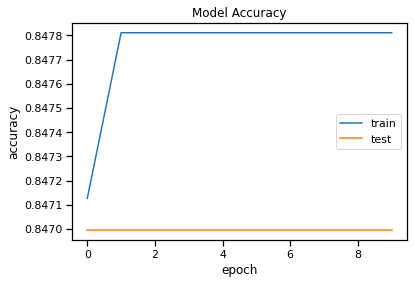

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

<a id="5"></a>
# <div style="text-align: center; background-color: #682F2F; font-family:newtimeroman;font-size:15px color: white; padding: 14px; line-height:0.5;border-radius:20px">Solution</div>

#### "Logistic Regressor" work best
##### Results:
    From the Boxlpot and ANN
    Logistic Regressor have highest avg accuracy of all Ml algo and ANN 

In [31]:
model = LogisticRegression()
model.fit(x_train,y_train)
model.score(x_train, y_train)*100

85.43091655266758

In [32]:
model.score(x_test,y_test)*100
y_pred = model.predict(x_test)

<AxesSubplot:>

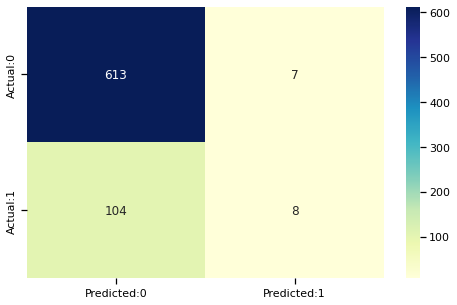

In [33]:
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

False Positives: 7 (Type I error)

False Negatives: 104 ( Type II error)

Since the model is predicting Heart disease too many type II errors is not advisable. A False Negative ( ignoring the probability of disease when there actually is one) is more dangerous than a False Positive in this case. Hence in order to increase the sensitivity, threshold can be lowered.

In [34]:
y_pred_prob=model.predict_proba(x_test)[:,:]
y_pred_prob_df=pd.DataFrame(data=y_pred_prob, columns=['Prob of no heart disease (0)','Prob of Heart Disease (1)'])
y_pred_prob_df.head()

,Prob of no heart disease (0),Prob of Heart Disease (1)
0,0.919060,0.080940
1,0.801358,0.198642
2,0.935280,0.064720
3,0.688821,0.311179
4,0.909131,0.090869


In [35]:
from sklearn.preprocessing import binarize
for i in range(1,5):
    cm2=0
    y_pred_prob_yes=model.predict_proba(x_test) 
    y_pred2=binarize(y_pred_prob_yes,i/10)[:,1]
    cm2=confusion_matrix(y_test,y_pred2)
    print ('With',i/10,'threshold the Confusion Matrix is ','\n',cm2,'\n',
            'with',cm2[0,0]+cm2[1,1],'correct predictions and',cm2[1,0],'Type II errors( False Negatives)','\n\n',
          'Sensitivity: ',cm2[1,1]/(float(cm2[1,1]+cm2[1,0])),'Specificity: ',cm2[0,0]/(float(cm2[0,0]+cm2[0,1])),'\n\n\n')
    

With 0.1 threshold the Confusion Matrix is  
 [[296 324]
 [ 25  87]] 
 with 383 correct predictions and 25 Type II errors( False Negatives) 

 Sensitivity:  0.7767857142857143 Specificity:  0.4774193548387097 



With 0.2 threshold the Confusion Matrix is  
 [[486 134]
 [ 54  58]] 
 with 544 correct predictions and 54 Type II errors( False Negatives) 

 Sensitivity:  0.5178571428571429 Specificity:  0.7838709677419354 



With 0.3 threshold the Confusion Matrix is  
 [[574  46]
 [ 79  33]] 
 with 607 correct predictions and 79 Type II errors( False Negatives) 

 Sensitivity:  0.29464285714285715 Specificity:  0.9258064516129032 



With 0.4 threshold the Confusion Matrix is  
 [[608  12]
 [ 97  15]] 
 with 623 correct predictions and 97 Type II errors( False Negatives) 

 Sensitivity:  0.13392857142857142 Specificity:  0.9806451612903225 





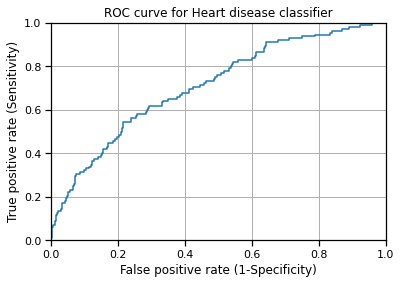

In [36]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [325]:
sklearn.metrics.roc_auc_score(y_test,y_pred_prob_yes[:,1])

0.707272465437788

In [37]:
print(classification_report(y_test,y_pred ))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       620
           1       0.53      0.07      0.13       112

    accuracy                           0.85       732
   macro avg       0.69      0.53      0.52       732
weighted avg       0.81      0.85      0.80       732



<a id="5"></a>
# <div style="text-align: center; background-color: #682F2F; font-family:newtimeroman;font-size:15px color: white; padding: 14px; line-height:0.5;border-radius:20px">Conclusion</div>

- **All attributes selected after the elimination process show Pvalues lower than 5% and thereby suggesting significant role in the Heart disease prediction.**

- **Men seem to be more susceptible to heart disease than women.Increase in Age,number of cigarettes smoked per day and systolic Blood Pressure also show increasing odds of having heart disease.**

- **Total cholesterol shows no significant change in the odds of CHD. This could be due to the presence of 'good cholesterol(HDL) in the total cholesterol reading.Glucose too causes a very negligible change in odds (0.2%)**

- **The model predicted with 0.88 accuracy. The model is more specific than sensitive.**

- **The Area under the ROC curve is 73.5 which is somewhat satisfactory.**

- **Overall model could be improved with more data.**